In [1]:
import numpy as np
!pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

     |████████████████████████████████| 1.0MB 25.5MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=42ad48af5036edfd250321aaf9ec6f37d768a3f131329f84cf886df26e695f58
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
data_path = "/content/drive/MyDrive/ADM/WinnipegDataset_PCA_GA_revised.csv"
pd_data = pd.read_csv(data_path)
pd_data.head()

,label,f3,f4,f8,f11,f26,f28,f34,f50,f58,f83,f93,f101,f103,f122,f140,f143,f155,f167
0,6,-16.5240,-20.043,-10.0250,2.7094,0.013174,0.68648,0.045229,-19.6580,-11.1330,0.069902,0.005024,0.017,0.386,1.358000,4533,2.4851,0.145850,2.5556
1,1,-8.4314,-11.446,-8.3004,2.5071,0.062497,0.64083,0.108470,-8.7655,-7.3826,0.092869,0.052145,0.021,0.390,0.246910,3641,4.3886,0.199670,0.0000
2,4,-18.3930,-23.072,-9.4808,4.8397,0.008322,0.70069,0.057388,-20.3520,-7.3504,0.091151,0.004449,0.029,0.241,0.543210,4377,3.5261,0.207610,2.0000
3,6,-16.3840,-19.722,-11.1120,3.0984,0.018220,0.71220,0.032811,-19.3120,-11.0470,0.070371,0.005182,0.008,0.390,0.098765,4010,2.5542,0.111110,2.0000
4,6,-15.1070,-19.087,-9.1981,4.1163,0.022670,0.75428,0.050915,-21.3390,-12.1560,0.056778,0.005019,0.037,0.300,0.395060,4918,1.1997,-0.001016,4.7778


In [3]:
data_path = "/content/drive/MyDrive/ADM/bin_range_PCA_GA_revised_3.csv"
bin_range = pd.read_csv(data_path)
bin_range.head()

,0,1,2,3
0,-23.161000,-15.072667,-6.984333,1.10400
1,-27.245000,-17.905030,-8.565060,0.77491
2,-16.389000,-11.317800,-6.246600,-1.17540
3,-4.281900,0.882733,6.047367,11.21200
4,0.003183,0.256328,0.509474,0.76262


In [4]:
print(pd_data.shape, bin_range.shape)

(325834, 19) (18, 4)


In [5]:
fuzzy_var = {}
cols = list(pd_data.columns)
cols.pop(0)
cols
# range(len(bin_range))

['f3',
 'f4',
 'f8',
 'f11',
 'f26',
 'f28',
 'f34',
 'f50',
 'f58',
 'f83',
 'f93',
 'f101',
 'f103',
 'f122',
 'f140',
 'f143',
 'f155',
 'f167']

In [6]:
bin_range.iloc[2]

0   -16.3890
1   -11.3178
2    -6.2466
3    -1.1754
Name: 2, dtype: float64

In [7]:
for i,j in zip(cols, range(len(bin_range))):
#     print(pd_data[i])
#     print(pd_data[i].min())
#     print(list(bin_range.iloc[j]))
#     print(bin_range.iloc[j]['1'])
    l = list(bin_range.iloc[j])
    fuzzy_var[j] = ctrl.Antecedent(np.arange(pd_data[i].min(), pd_data[i].max(), 0.001), i)
    # print(type(f1))
    fuzzy_var[j]['0'] = fuzz.trimf(fuzzy_var[j].universe, [l[0], l[0], (l[0] + l[3]) / 2])
    fuzzy_var[j]['1'] = fuzz.trimf(fuzzy_var[j].universe, [(l[0] + l[1]) / 2, (l[1] + l[2]) / 2, (l[2] + l[3]) / 2])
    fuzzy_var[j]['2'] = fuzz.trimf(fuzzy_var[j].universe, [(l[1] + l[2]) / 2, l[3], l[3]])
    print(j)
#     break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


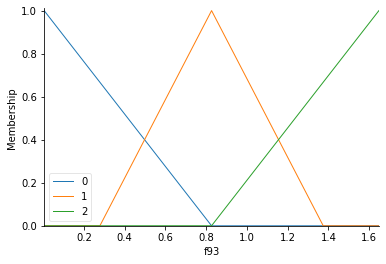

In [8]:
fuzzy_var[10].view()

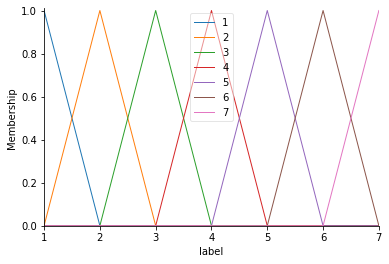

In [9]:
label = ctrl.Consequent(np.arange(1, 8, 1), 'label', defuzzify_method='mom')
label.automf(7, names = ['1', '2', '3', '4', '5', '6', '7'])
label.view()

In [10]:
for i in range(len(cols)):
  print(i, cols[i])

0 f3
1 f4
2 f8
3 f11
4 f26
5 f28
6 f34
7 f50
8 f58
9 f83
10 f93
11 f101
12 f103
13 f122
14 f140
15 f143
16 f155
17 f167


In [11]:
fuzzy_var[2]

Antecedent: f8

In [12]:
rule1 = ctrl.Rule((fuzzy_var[1]['1'] | fuzzy_var[1]['2']) & fuzzy_var[14]['0'] , label['1'])
rule2 = ctrl.Rule((fuzzy_var[1]['1'] | fuzzy_var[1]['2']) & (fuzzy_var[14]['1'] | fuzzy_var[14]['2']) & fuzzy_var[15]['2'] & fuzzy_var[2]['2']  , label['2'])
rule3 = ctrl.Rule((fuzzy_var[1]['1'] | fuzzy_var[1]['2']) & (fuzzy_var[14]['1'] | fuzzy_var[14]['2']) & (fuzzy_var[15]['0'] | fuzzy_var[15]['1']), label['3'])
rule4 = ctrl.Rule(fuzzy_var[1]['0'] & (fuzzy_var[8]['1'] | fuzzy_var[8]['2']) & fuzzy_var[16]['2'] & fuzzy_var[12]['2'], label['3'])
rule5 = ctrl.Rule(fuzzy_var[1]['0'] & (fuzzy_var[8]['1'] | fuzzy_var[8]['2']) & (fuzzy_var[16]['0'] | fuzzy_var[16]['1']) & (fuzzy_var[12]['1'] | fuzzy_var[12]['2']) & (fuzzy_var[14]['1'] | fuzzy_var[14]['2']) & fuzzy_var[5]['2'], label['4'])   
rule6 = ctrl.Rule(fuzzy_var[1]['0'] & (fuzzy_var[8]['1'] | fuzzy_var[8]['2']) & fuzzy_var[16]['2'] & (fuzzy_var[12]['1'] | fuzzy_var[12]['2']), label['4'])
rule7 = ctrl.Rule((fuzzy_var[1]['1'] | fuzzy_var[1]['2']) & (fuzzy_var[14]['1'] | fuzzy_var[14]['2']) & fuzzy_var[15]['2'] & (fuzzy_var[2]['0'] | fuzzy_var[2]['1']), label['4'])
rule8 = ctrl.Rule(fuzzy_var[1]['0'] & fuzzy_var[8]['0'] & fuzzy_var[16]['2'], label['4'])
rule9 = ctrl.Rule(fuzzy_var[1]['0'] & (fuzzy_var[8]['1'] | fuzzy_var[8]['2']) & fuzzy_var[12]['0'] , label['4'])
rule10 = ctrl.Rule(fuzzy_var[1]['0'] & (fuzzy_var[8]['1'] | fuzzy_var[8]['2']) & (fuzzy_var[16]['0'] | fuzzy_var[16]['1']) & (fuzzy_var[5]['0'] | fuzzy_var[5]['1']), label['5'])
rule11 = ctrl.Rule(fuzzy_var[1]['0'] & (fuzzy_var[8]['1'] | fuzzy_var[8]['2']) & (fuzzy_var[16]['0'] | fuzzy_var[16]['1']) & (fuzzy_var[12]['0'] | fuzzy_var[12]['1']) & fuzzy_var[14]['0'] & fuzzy_var[5]['2'], label['6'])
rule12 = ctrl.Rule(fuzzy_var[1]['0'] & fuzzy_var[8]['0'] & (fuzzy_var[16]['0'] | fuzzy_var[16]['1']) , label['6'])

In [23]:
rule4

IF ((f4[0] AND (f58[1] OR f58[2])) AND f155[2]) AND f103[2] THEN label[3]
	AND aggregation function : fmin
	OR aggregation function  : fmax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe8fa45e410>)

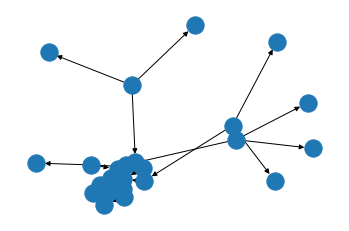

In [24]:
rule4.view()

In [13]:
label_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

In [14]:
crop = ctrl.ControlSystemSimulation(label_ctrl)

In [15]:
crop.input

f4 : None
f140 : None
f143 : None
f8 : None
f58 : None
f155 : None
f103 : None
f28 : None

In [16]:
pd_data.iloc[265490]

label       3.000000
f3        -13.505000
f4        -14.698000
f8         -8.043200
f11         3.014300
f26         0.043726
f28         0.803210
f34         0.078884
f50       -13.924000
f58        -5.302900
f83         0.121230
f93         0.012136
f101        0.064000
f103        0.493000
f122        1.333300
f140     5643.000000
f143        3.782400
f155        0.247210
f167        3.000000
Name: 265490, dtype: float64

In [17]:
l = ['f4', 'f140', 'f143', 'f8', 'f58', 'f155', 'f103', 'f28']

In [18]:
for i in l:
  crop.input[i] = pd_data.iloc[265490][i]

In [19]:
crop.compute()

In [20]:
print(crop.clip_to_bounds, crop.output['label'])
for i in crop.output:
  print(i)

True 3.0261056334584944
label


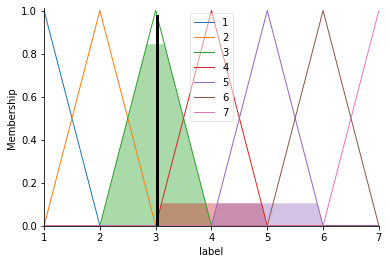

In [21]:
label.view(sim=crop)

In [ ]:
test_data = pd_data.sample(n = int(len(pd_data) * 0.20))
test_data

,label,f3,f4,f8,f11,f26,f28,f34,f50,f58,f83,f93,f101,f103,f122,f140,f143,f155,f167
294519,6,-19.9690,-23.431,-10.4880,5.8272,0.007301,0.68501,0.086429,-20.5320,-9.6091,0.069911,0.004299,0.008,0.471,0.24691,4021,3.0748,0.16601,1.0000
266389,1,-9.3209,-11.999,-7.6135,2.4220,0.065928,0.70466,0.094230,-9.1119,-6.8290,0.106890,0.045128,0.022,0.433,0.39506,3703,4.5266,0.19010,0.0000
36096,6,-19.6750,-21.589,-8.9024,3.3554,0.010192,0.77823,0.064246,-19.7370,-7.8119,0.077050,0.005551,0.014,0.472,0.24691,4224,3.1746,0.17660,1.3333
234427,5,-16.3370,-20.083,-8.4273,5.0281,0.015947,0.74828,0.078932,-20.1120,-7.4323,0.078017,0.004516,0.018,0.450,1.58020,4456,3.1378,0.20400,2.0000
126499,6,-16.9160,-20.509,-10.6620,4.9299,0.015948,0.70877,0.050943,-18.7260,-8.5166,0.094767,0.005505,0.007,0.459,1.11110,4125,3.1999,0.16657,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91582,4,-16.8430,-20.914,-9.6229,3.5588,0.014087,0.71796,0.040982,-19.2150,-8.8695,0.055040,0.008514,0.037,0.252,4.66670,4297,4.2491,0.23141,1.0000
265490,3,-13.5050,-14.698,-8.0432,3.0143,0.043726,0.80321,0.078884,-13.9240,-5.3029,0.121230,0.012136,0.064,0.493,1.33330,5643,3.7824,0.24721,3.0000
193843,4,-17.9360,-21.236,-8.3222,3.6023,0.009793,0.72188,0.067005,-17.1320,-6.3445,0.068890,0.009707,0.081,0.284,0.17284,5012,4.3620,0.24941,1.6667
124848,6,-19.1320,-21.161,-8.5068,2.9429,0.011362,0.79512,0.056831,-18.5600,-9.3039,0.060318,0.008553,0.013,0.350,0.98765,4522,2.3949,0.15108,3.0000


In [ ]:
c = 0
for i, j in test_data.iterrows():
  actual_val = j['label']
  for k in l:
    crop.input[k] = j[k]
  crop.compute()
  pred = round(crop.output['label'])
  # print(pred, actual_val)
  if pred == actual_val:
    c+=1

print(c / len(test_data))

0.69049811251266
